***Question: do NBA teams win more at home than away?***

In [54]:
from pathlib import Path

print(Path().cwd())

c:\CODE\proj\nba\home_vs_away


In [55]:
games_csv_path = Path('../data/nba_games_data/games.csv') 
assert games_csv_path.exists()

In [56]:
import pandas as pd
import numpy as np

games_df = pd.read_csv(games_csv_path)
print(games_df.shape)

(25796, 21)


In [57]:
all_games = games_df.sort_values('GAME_DATE_EST', ascending=False)

In [58]:
print(all_games.head(2))

  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-03-12  22101005            Final    1610612748       1610612750   
4    2022-03-12  22101009            Final    1610612743       1610612761   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2021    1610612748     104.0        0.398         0.76  ...      23.0   
4    2021    1610612743     115.0        0.551         0.75  ...      32.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
0      53.0    1610612750     113.0        0.422        0.875         0.357   
4      39.0    1610612761     127.0        0.471        0.760         0.387   

   AST_away  REB_away  HOME_TEAM_WINS  
0      21.0      46.0               0  
4      28.0      50.0               0  

[2 rows x 21 columns]


In [59]:
print(all_games.tail(2))

      GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
18432    2003-10-06  10300002            Final    1610612763       1610612749   
18433    2003-10-05  10300001            Final    1610612762       1610612742   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
18432    2003    1610612763     105.0        0.494        0.618  ...   
18433    2003    1610612762      90.0        0.457        0.735  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
18432      25.0      48.0    1610612749      94.0        0.427          0.7   
18433      23.0      41.0    1610612742      85.0        0.447          0.5   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
18432         0.154      20.0      43.0               1  
18433         0.250      20.0      38.0               1  

[2 rows x 21 columns]


In [60]:
num_games = all_games.shape[0]
first_season = all_games.SEASON.min()
last_season = all_games.SEASON.max()

print(f'There are totally {num_games} games in this dataset.')
print(f'The dataset spans from {first_season} season to {last_season} season')
print(f'The oldest game played in {all_games.GAME_DATE_EST.min()}.')
print(f'The latest game played in {all_games.GAME_DATE_EST.max()}.')

There are totally 25796 games in this dataset.
The dataset spans from 2003 season to 2021 season
The oldest game played in 2003-10-05.
The latest game played in 2022-03-12.


In [61]:
num_home_win = all_games.HOME_TEAM_WINS.sum() 
ratio_home_win = num_home_win / num_games

print(f'Total number of home win is {num_home_win} out of total {num_games} games.')
print(f'In total, the ratio of home win is {ratio_home_win:.2%} among all games in this dataset.')

Total number of home win is 15155 out of total 25796 games.
In total, the ratio of home win is 58.75% among all games in this dataset.


**Can we say that NBA teams win more at home?**

Let's look at the games season by season.

In [82]:
seasons = range(first_season, last_season+1)
home_win_ratios = []
for s in seasons:
    games = all_games[all_games['SEASON'] == s]
    n_games = games.shape[0]
    n_home_wins = games.HOME_TEAM_WINS.sum()
    home_win_ratios.append(n_home_wins / n_games)
home_win_ratios = np.array(home_win_ratios)

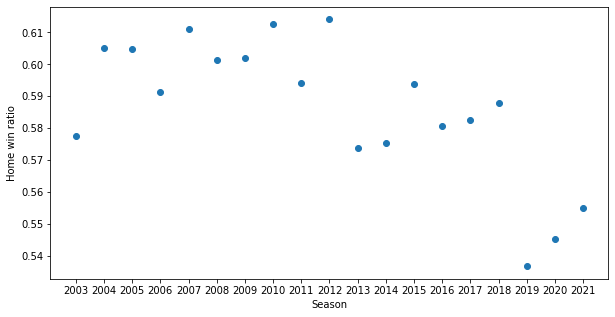

In [83]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
plt.scatter(seasons, home_win_ratios)
plt.xticks(seasons)
plt.xlabel('Season')
plt.ylabel('Home win ratio')
plt.show()

In [86]:
assert all(home_win_ratios > 0.5)

So, for all the seasons from 2003 to 2021, there more home-win than away-win.

**How about different teams? Is that only good teams win more and win more home-games  
or both good and bad teams win more home-games?**

First, we need to ask the question: what is a good team?

To simplify things, let's see a playoff team is better than a non-playoff team in each conference.  
So let's see a playoff team is a good team and a non-playoff team is a bad team.  
Then both Eastern Conference and Western Conference have 8 good teams and 7 bad teams

"Eastern Conference (NBA) 
The Eastern Conference is one of two conferences that make up the National Basketball Association (NBA), the other being the Western Conference. Both conferences consist of 15 teams organized into three divisions.  
(https://en.wikipedia.org/wiki/Eastern_Conference_(NBA))"

"The original format returns to 82 games after two seasons with 67 and 72 games, the 2019-20 season was shortened by the Covid-19 pandemic and the 2020-21 by the aforementioned... (https://www.msn.com/en-us/sports/nba/nba-2021-22-how-many-games-are-in-the-nba-202122-season/ar-AAPEOcl)"

In [ ]:
num_regular_games = 82 # not for 2019-20 and 2020-21 seasons

# remove 2019 and beyond season


2018–19 NBA season (https://en.wikipedia.org/wiki/2018%E2%80%9319_NBA_season)

"The 2018–19 NBA season was the 73rd season of the National Basketball Association (NBA). The regular season began on October 16, 2018, and ended on April 10, 2019. The 2019 NBA All-Star Game was played on February 17, 2019, at the Spectrum Center in Charlotte, North Carolina. The playoffs began on April 13, 2019[1] and ended on June 13 with the Toronto Raptors defeating the defending NBA champion Golden State Warriors in the 2019 NBA Finals, becoming NBA champions for the first time in franchise history and the first team in NBA history to win a championship without a single lottery pick on the roster."

In [ ]:
games_2018 = all_games[all_games['SEASON'] == 2018]  # season 2018-2019

regular_start_2018 = '2018-10-16'
regular_end_2018 = '2019-04-10'

playoff_start_2018 = '2019-04-13'
playoff_end_2018 = '2019-06-13'

In [ ]:
regulars_2018 = games_2018[(regular_start_2018 <= games_2018['GAME_DATE_EST'])
                           & (games_2018['GAME_DATE_EST'] <= regular_end_2018)]

playoff_2018 = games_2018[(playoff_start_2018 <= games_2018['GAME_DATE_EST'])
                          & (games_2018['GAME_DATE_EST'] <= playoff_end_2018)]

In [ ]:
regulars_2018_sorted = regulars_2018.sort_values('GAME_DATE_EST')
playoff_2018_sorted = playoff_2018.sort_values('GAME_DATE_EST')

In [ ]:
print(regulars_2018.head(2))

      GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
18888    2019-04-10  21801229            Final    1610612746       1610612762   
18883    2019-04-10  21801224            Final    1610612755       1610612741   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
18888    2018    1610612746     143.0        0.509        0.767  ...   
18883    2018    1610612755     125.0        0.559        0.600  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
18888      34.0      52.0    1610612762     137.0        0.443        0.879   
18883      30.0      47.0    1610612741     109.0        0.474        0.667   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
18888         0.400      31.0      57.0               1  
18883         0.375      21.0      39.0               1  

[2 rows x 21 columns]


In [ ]:
GSW_team_id = 1610612744